# Exercise 1: Speeding fines bar graph

The TSV file aachen_speed_trap.tsv has information on speeding tickets issued to drivers in the city of
Aachen in 2020. Based on these data, generate a bar graph that shows the top 10 "crime scenes" (i.e.,
locations where the speed traps were located) by sum of fines.

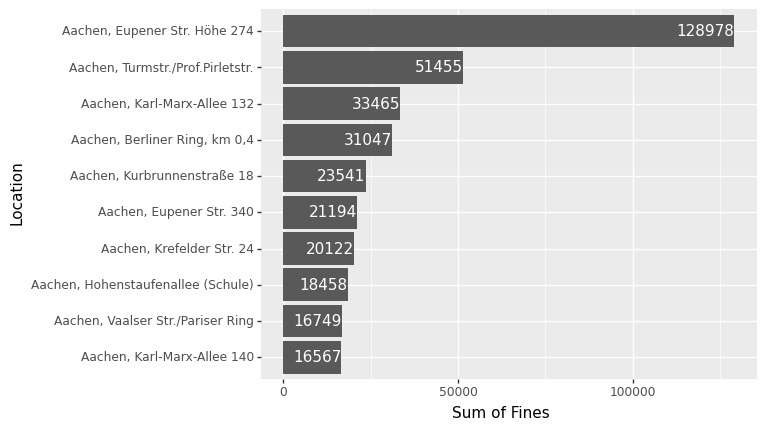

<ggplot: (350564563)>

In [3]:
import pandas as pd
import plotnine

#open file as panda dataframe
df = pd.read_csv("aachen_speed_trap.tsv", sep= '\t')
 

max_location = df.groupby("Location")["Fine"].sum()
max_location = max_location.nlargest(10).reset_index()

#start building plot
(plotnine.ggplot(max_location, plotnine.aes(x="reorder(Location, Fine)", y="Fine", label="Fine"))
    + plotnine.geom_bar(stat="identity")
 #flip x and y axis
    + plotnine.coord_flip()
#add numbers to bars
    + plotnine.geom_text(ha="right", va="center", color="white")
     #label X axis
     + plotnine.xlab("Location")
     #label y axis
     + plotnine.ylab("Sum of Fines")
)

# Exercise 2: Speeding fines line graph

The TSV file aachen_speed_trap.tsv has information on speeding tickets issued to drivers in the city of
Aachen in 2020. Using this file, create a line graph that shows the total amount of fines incurred in all
of Aachen during each month of 2020.

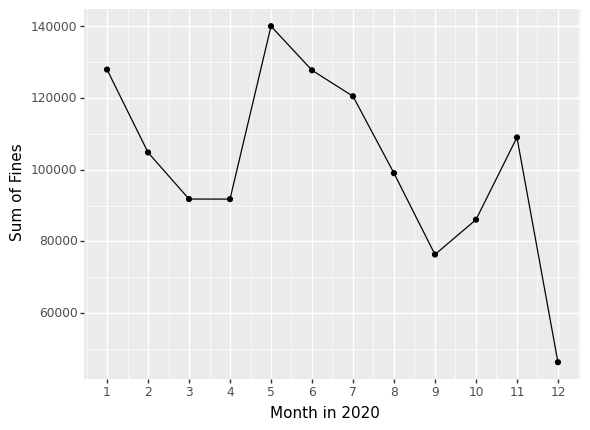

<ggplot: (378706737)>

In [15]:
import pandas as pd
import plotnine

#open file as panda dataframe
df = pd.read_csv("aachen_speed_trap.tsv", sep= '\t')

fines = df.groupby("Month")["Fine"].sum()
fines = fines.reset_index()


(plotnine.ggplot(fines, plotnine.aes("Month", "Fine",))
     + plotnine.geom_line()
 #need to change the month interval. it is showing up as 2.5 5. etc. 
     + plotnine.scales.scale_x_continuous(breaks=range(1,13))
     #draw points on plot
     + plotnine.geom_point()
     #rename x axis
     + plotnine.xlab("Month in 2020")
     #rename y axis
     + plotnine.ylab("Sum of Fines")
)
